## Sesión 1: Perfiles de velocidad

**Hotkeys útiles**: haciendo click fuera de la celda, es posible realizar una serie de operaciones con distintas combinaciones de letras:

* Presionar A para agregar una celda sobre la celda actual 
* Presionar B para agregar una celda bajo la celda actual
* Presionar dos veces D para eliminar una celda
* Presionar `Shift+Enter` para ejecutar una celda
* Presionar Y para cambiar una celda desde Markdown a Code
* Presionar M para cambiar una celda desde Code a Markdown

In [1]:
# Importamos los paquetes que necesitamos
import numpy as np
import matplotlib.pyplot as plt

## Preparar las variables computacionales

In [2]:
# Definimos las variables
rho = 1e3 # kg/m^3
delta = 5e-3 # m
mu = 2e-3 # Pa * s
g = 9.81 # m/s^2

# Ángulo de la superficie con respecto a la aceleración de la gravedad
# beta = 0: placa vertical, velocidad máxima. beta = pi/2: placa horizontal, fluido quieto
beta = np.pi/4

Primero evaluaremos la velocidad en una posición particular

In [3]:
# posición de ejemplo
x = delta/2 

# Escribimos la ecuación
v_z = rho * g * np.cos(beta) * delta**2 / (2*mu) * (1 - (x/delta)**2)

# Imrpimimos el resultado
print("v_z(x = %.3f m) = %.3f m/s" % (x, v_z))

v_z(x = 0.003 m) = 32.516 m/s


### Con Numpy, también podemos evaluar la velocidad en un vector de posiciones. 

Esto se llam evaluación "vectorizada", y es computacionalmente más eficiente que iterar por una lista de posiciones. Para esto, en primer lugar debemos definir un vector de posiciones (NumPy Array). Hay muchas maneras de hacer esto. En este curso utilizaremos la función `np.linspace(x_0, x_f, n)`

In [4]:
x_vec = np.linspace(0, delta, 100)
print(x_vec)

[0.00000000e+00 5.05050505e-05 1.01010101e-04 1.51515152e-04
 2.02020202e-04 2.52525253e-04 3.03030303e-04 3.53535354e-04
 4.04040404e-04 4.54545455e-04 5.05050505e-04 5.55555556e-04
 6.06060606e-04 6.56565657e-04 7.07070707e-04 7.57575758e-04
 8.08080808e-04 8.58585859e-04 9.09090909e-04 9.59595960e-04
 1.01010101e-03 1.06060606e-03 1.11111111e-03 1.16161616e-03
 1.21212121e-03 1.26262626e-03 1.31313131e-03 1.36363636e-03
 1.41414141e-03 1.46464646e-03 1.51515152e-03 1.56565657e-03
 1.61616162e-03 1.66666667e-03 1.71717172e-03 1.76767677e-03
 1.81818182e-03 1.86868687e-03 1.91919192e-03 1.96969697e-03
 2.02020202e-03 2.07070707e-03 2.12121212e-03 2.17171717e-03
 2.22222222e-03 2.27272727e-03 2.32323232e-03 2.37373737e-03
 2.42424242e-03 2.47474747e-03 2.52525253e-03 2.57575758e-03
 2.62626263e-03 2.67676768e-03 2.72727273e-03 2.77777778e-03
 2.82828283e-03 2.87878788e-03 2.92929293e-03 2.97979798e-03
 3.03030303e-03 3.08080808e-03 3.13131313e-03 3.18181818e-03
 3.23232323e-03 3.282828

Esto genera cien puntos igualmente espaciados entre $x_0 = 0$ y $x_f = \delta = 0.005 m$. Ahora podemos evaluar la expresión del perfil de velocidades sobre el vector.

In [5]:
v_z = rho * g * np.cos(beta) * delta**2 / (2*mu) * (1 - (x_vec/delta)**2)
print(v_z)

[43.35448452 43.35006105 43.33679062 43.31467324 43.28370891 43.24389763
 43.1952394  43.13773422 43.07138208 42.996183   42.91213696 42.81924397
 42.71750403 42.60691714 42.4874833  42.35920251 42.22207476 42.07610007
 41.92127842 41.75760982 41.58509427 41.40373177 41.21352232 41.01446592
 40.80656257 40.58981226 40.364215   40.1297708  39.88647964 39.63434153
 39.37335647 39.10352445 38.82484549 38.53731957 38.24094671 37.93572689
 37.62166012 37.2987464  36.96698573 36.62637811 36.27692353 35.91862201
 35.55147353 35.17547811 34.79063573 34.3969464  33.99441012 33.58302688
 33.1627967  32.73371957 32.29579548 31.84902444 31.39340645 30.92894151
 30.45562962 29.97347078 29.48246499 28.98261224 28.47391255 27.9563659
 27.4299723  26.89473175 26.35064425 25.7977098  25.23592839 24.66530004
 24.08582473 23.49750248 22.90033327 22.29431711 21.679454   21.05574394
 20.42318692 19.78178296 19.13153204 18.47243418 17.80448936 17.12769759
 16.44205887 15.7475732  15.04424057 14.332061   13.

## Gráficar

En estos momentos estamos listos para poder gráficar el perfil de velocidad.
* El comando más sencillo para graficar es `plot` desde matplotlib.
* Para utilizarlo, debemos utilizar la sintáxis `plt.plot(x, y, **args)`.

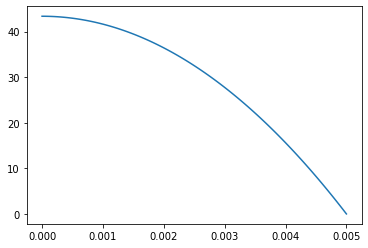

In [6]:
plt.plot(x_vec,v_z)
plt.show()

Agreguemos ahora algunos títulos a los ejes

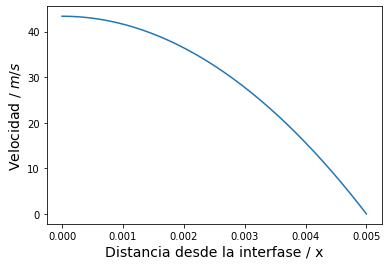

In [7]:
plt.plot(x_vec,v_z)
# Agregamos título a los ejes y especificamos su tamaño
plt.xlabel('Distancia desde la interfase / x', size=14)
plt.ylabel('Velocidad / $m/s$', size = 14)
plt.show()

## Mejorar la calidad del código y del gráfico

Si quisieramos utilizar el perfil de velocidad para distintos parámetros, sería útil definir la velocidad como una función. Esto haremos en esta sección. Para ello, utilizaremos la sintáxis de Python para definir funciones:

In [8]:
def v_z_film(x, rho, mu, delta, beta, g=9.81):
    '''
    Calcula la velocidad de un film descendente de un fluido
    en un plano inclinado en un ángulo beta.
    
    Documentar el codigo
    
    '''
    v = rho * g * np.cos(beta) * delta**2 / (2*mu) * (1 - (x/delta)**2)
    return v

In [9]:
v_z_film(x_vec, rho, mu, delta, beta)

array([43.35448452, 43.35006105, 43.33679062, 43.31467324, 43.28370891,
       43.24389763, 43.1952394 , 43.13773422, 43.07138208, 42.996183  ,
       42.91213696, 42.81924397, 42.71750403, 42.60691714, 42.4874833 ,
       42.35920251, 42.22207476, 42.07610007, 41.92127842, 41.75760982,
       41.58509427, 41.40373177, 41.21352232, 41.01446592, 40.80656257,
       40.58981226, 40.364215  , 40.1297708 , 39.88647964, 39.63434153,
       39.37335647, 39.10352445, 38.82484549, 38.53731957, 38.24094671,
       37.93572689, 37.62166012, 37.2987464 , 36.96698573, 36.62637811,
       36.27692353, 35.91862201, 35.55147353, 35.17547811, 34.79063573,
       34.3969464 , 33.99441012, 33.58302688, 33.1627967 , 32.73371957,
       32.29579548, 31.84902444, 31.39340645, 30.92894151, 30.45562962,
       29.97347078, 29.48246499, 28.98261224, 28.47391255, 27.9563659 ,
       27.4299723 , 26.89473175, 26.35064425, 25.7977098 , 25.23592839,
       24.66530004, 24.08582473, 23.49750248, 22.90033327, 22.29

### Graficando el perfil para tres distintas inclinaciones

In [10]:
beta_1 = np.pi/4
beta_2 = np.pi/6
beta_3 = np.pi/8

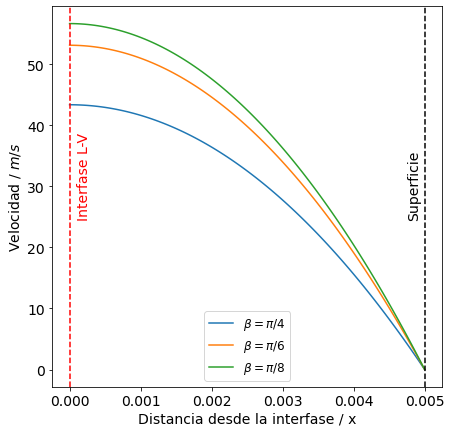

In [11]:
# Primer gráfico
plt.figure(figsize=[7,7])
plt.plot(x_vec, v_z_film(x_vec, rho, mu, delta, beta_1), 
         label=r'$\beta = \pi/4$')

# Para agregar más gráficos, simplemente añadimos más instrucciones
# plt.plot mediante líneas de código
plt.plot(x_vec, v_z_film(x_vec, rho, mu, delta, beta_2),
        label = r'$\beta = \pi/6$')

plt.plot(x_vec, v_z_film(x_vec, rho, mu, delta, beta_3),
        label = r'$\beta = \pi/8$')


# Agregamos título a los ejes y especificamos su tamaño
plt.xlabel('Distancia desde la interfase / x', size=14)
plt.ylabel('Velocidad / $m/s$', size = 14)

plt.tick_params(labelsize=14)
plt.legend(fontsize=12)


# Anotar la superficie
plt.axvline(delta, ls='--', color='k')
plt.annotate('Superficie', xy=(0.95*delta, 25), rotation=90, size=14)
# Anotar la interface
plt.axvline(0, ls='--', color='r')
plt.annotate('Interfase L-V', xy=(delta*0.02, 25), rotation=90, size=14, color='r')
plt.show()

## Cálculo de velocidad promedio

Sabemos que la velocidad promedio es

$$ <v_z> = \frac{\rho g \delta^2 cos(\beta)}{3 \mu}$$

In [12]:
# Definimos la expresión analítica para calcular v_z_an
v_av_an = (rho * g * delta**2 *  np.cos(beta))/(3*mu)
print("v_av, analítico = %.5e m/s" % v_av_an)

v_av, analítico = 2.89030e+01 m/s


Para perfiles de velocidad más complejos, no necesariamente obtendremos una expresión analítica para evaluar la velocidad promedio. En estos casos, se sugiere utilizar un método numérico, tal como la [regla trapezoidal](https://www.khanacademy.org/math/ap-calculus-ab/ab-integration-new/ab-6-2/a/understanding-the-trapezoid-rule).

In [13]:
v_av_num = np.trapz(v_z,x_vec) / delta
print("v_av, numérico = %.5e m/s" % v_av_num)

v_av, numérico = 2.89023e+01 m/s


Podemos calcular el error de discretización $\epsilon$ obtenido al utilizar la regla trapezoidal,

In [14]:
eps = (v_av_num-v_av_an)
print(eps)
# También podemos calcular el error porcentual
print("Error de discretización porcentual = %.3e %%" % (100 * eps/v_av_num))

-0.0007372459361612016
Error de discretización porcentual = -2.551e-03 %


Este error es directamente función del espaciamiento en la grilla computacional.

In [15]:
dx = x_vec[1]-x_vec[0]
print("dx = %.3e m" % dx)

dx = 5.051e-05 m


### Disminuyendo el error de discretización

In [16]:
x_fino = np.linspace(0,delta,1000)

In [17]:
v_av_num_fino = np.trapz(v_z_film(x_fino, rho, mu, delta, beta), x_fino)/delta
eps = (v_av_num_fino-v_av_an)
print(eps)
# También podemos calcular el error porcentual
print("Error de discretización porcentual = %.3e %%" % (100 * eps/v_av_num_fino))

-7.240220618598414e-06
Error de discretización porcentual = -2.505e-05 %


Más información sobre como anotar gráficos en Python:

1.  [Matplotlib text annotations tutorial](
https://matplotlib.org/stable/tutorials/text/annotations.html#sphx-glr-tutorials-text-annotations-py)

2. [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/), sección 4 y apéndice
